1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

- Ensemble learning combines multiple base models (learners) to produce a single, usually stronger model. The fundamental idea is that different models make different errors; by combining them (averaging, voting, or stacking), we can reduce variance, bias, or improve predictions compared to any single model.

- Bagging (Bootstrap AGGregatING)

- Approach: Train many independent base learners in parallel on bootstrap samples (random samples with replacement) of the training data. Final prediction is usually majority vote (classification) or average (regression).

- Objective: Reduce variance (helpful for high-variance models like decision trees). Each learner sees different data and the averaging reduces overfitting.

Boosting

- Approach: Train learners sequentially. Each new learner focuses on mistakes made by previous ones (by reweighting samples or by fitting residuals). Learners are combined in a weighted manner to produce strong final model.

- Objective: Reduce bias by sequentially correcting errors — producing a strong learner via many weak learners.

- Key difference: Bagging builds independent models on different data subsets (parallel), aiming to reduce variance. Boosting builds models that depend on previous models (sequential), aiming to reduce bias and error.

2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.


- Random Forest builds an ensemble of decision trees using bagging and feature randomness. It reduces overfitting compared to a single decision tree through:

- Bootstrap sampling (each tree trained on a random subset of data) — reduces correlation between trees.

- Random subset of features at each split (feature bagging) — prevents a few strong predictors from dominating every split, increasing diversity across trees.

- Two key hyperparameters:

  - n_estimators (number of trees): More trees usually reduce variance and stabilize predictions (to a point). Larger number → more averaging → less variance.

  - max_features (number of features considered for each split): Smaller max_features increases randomness and reduces correlation between trees, reducing variance but possibly increasing bias. Tuning balances bias-variance.

Other helpful params: max_depth (caps tree depth to reduce overfitting), min_samples_leaf.

3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

- Stacking (stacked generalization) is an ensemble method that trains multiple base learners (level-0 models) and then trains a meta-learner (level-1 model) on the base learners’ outputs (predictions or probabilities). The meta-learner learns how to best combine base learners’ predictions.

- Difference from bagging/boosting:

  - Bagging & boosting aggregate predictions directly (vote, average, weighted sum) and focus on variance/bias reduction through resampling/sequence.

  - Stacking uses a learned combiner (meta-model) which may capture patterns in base model errors and combine models non-linearly.

- Simple example use case:

  - Base models: logistic regression, random forest, SVM.

  - Meta-learner: a small neural network or logistic regression that takes the base models’ predictions as input and learns final prediction.

  - Use-case: Kaggle-style tabular problems where heterogeneous base learners improve performance when combined nonlinearly.

4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Out-Of-Bag (OOB) score:

When each tree is trained on a bootstrap sample, about ~1/3 of training samples are not included (out-of-bag) for that tree.

The OOB score uses those excluded samples to get unbiased estimates of prediction error: for each training sample, average predictions from trees that did not see it, then compare to true label.

Why useful:

Provides a built-in cross-validation-like estimate without a separate validation set, saving data for training.

Good for model selection and hyperparameter tuning when you want to avoid holding out a validation set.

5. Compare AdaBoost and Gradient Boosting in terms of:
- ● How they handle errors from weak learners
- ● Weight adjustment mechanism
- ● Typical use cases

1. How they handle errors from weak learners:

- AdaBoost: Reweights training samples; misclassified samples get higher weights so subsequent weak learners focus on them.

- Gradient Boosting: Fits the new learner to the negative gradient (residuals) of the loss function; each learner models errors (residuals) directly.

2. Weight adjustment mechanism:

- AdaBoost: Maintains example weights and updates them multiplicatively based on previous learners’ performance; learners also get weight in final prediction depending on accuracy.

- Gradient Boosting: Learners are added with a learning rate; each learner tries to minimize a differentiable loss by fitting to residuals; no explicit sample reweighting in the same sense as AdaBoost.

3. Typical use cases:

- AdaBoost: Simple and effective on binary classification with clean data and weak learners (e.g., shallow trees). Sensitive to noisy data and outliers.

- Gradient Boosting: More flexible (can use different loss functions) and often more powerful (e.g., XGBoost, LightGBM, CatBoost). Widely used for tabular prediction tasks with careful tuning.

6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

- CatBoost uses techniques to handle categorical features natively, avoiding naive one-hot encoding which can blow up dimensionality or leak information:

- It applies ordered target statistics (target encoding) in a way that prevents target leakage by computing statistics using only a subset/order of data points (permutation-driven / ordered boosting).

- It combines categorical features into combinations and uses efficient encoding to capture interactions.

- The algorithm’s handling of categorical variables is integrated into gradient boosting training and is robust to high-cardinality categorical features.

Result: minimal preprocessing needed, and strong performance on tabular datasets with categorical columns.

In [1]:
# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
# Optimization
# Task:
# 1. Load the Wine dataset (sklearn.datasets.load_wine()).
# 2. Split data into 70% train and 30% test.
# 3. Train a KNN classifier (default K=5) without scaling and evaluate using:
# a. Accuracy
# b. Precision, Recall, F1-Score (print classification report)
# 4. Apply StandardScaler, retrain KNN, and compare metrics.
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
# (Euclidean, Manhattan).
# 6. Train the optimized KNN and compare results with the unscaled/scaled versions.
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3. KNN default (K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("KNN (K=5) without scaling")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# 4. Scale with StandardScaler and retrain
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
y_pred_scaled = knn_scaled.predict(X_test_s)

print("KNN (K=5) with StandardScaler")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for best K (1..20) and metric (euclidean/manhattan)
param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_s, y_train)  # search on scaled features

print("Best params:", grid.best_params_)

# 6. Train optimized KNN and compare
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_s)
print("Optimized KNN accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


KNN (K=5) without scaling
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

KNN (K=5) with StandardScaler
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params: {'metric': 'euclidean', 'n_neighbors': 11}
Optimized KNN accuracy: 0.9629629629629629
              precision  

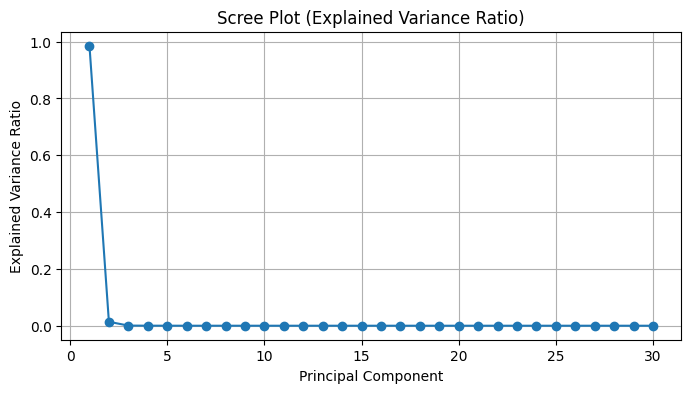

Number of components retained for 95% variance: 1
Accuracy original data: 0.9239766081871345
Accuracy PCA (95%) data: 0.9005847953216374


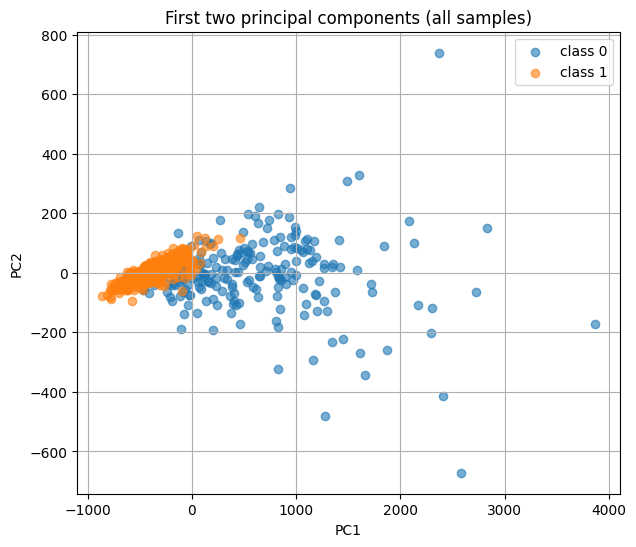

In [2]:
# Question 8 : PCA + KNN with Variance Analysis and Visualization
# Task:
# 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
# 2. Apply PCA and plot the scree plot (explained variance ratio).
# 3. Retain 95% variance and transform the dataset.
# 4. Train KNN on the original data and PCA-transformed data, then compare
# accuracy.
# 5. Visualize the first two principal components using a scatter plot (color by class).
# Q8: PCA + KNN on Breast Cancer dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
bc = load_breast_cancer()
X, y = bc.data, bc.target

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 2. PCA and scree plot (explained variance ratio)
pca_full = PCA()
pca_full.fit(X_train)
explained_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(explained_ratio)+1), explained_ratio, marker='o')
plt.title("Scree Plot (Explained Variance Ratio)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform
pca95 = PCA(n_components=0.95)
X_train_pca = pca95.fit_transform(X_train)
X_test_pca = pca95.transform(X_test)
print("Number of components retained for 95% variance:", pca95.n_components_)

# 4. Train KNN on original and PCA-transformed
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
acc_orig = accuracy_score(y_test, knn_orig.predict(X_test))

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("Accuracy original data:", acc_orig)
print("Accuracy PCA (95%) data:", acc_pca)

# 5. Visualize first two principal components
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X)
plt.figure(figsize=(7,6))
for cls in np.unique(y):
    idx = (y == cls)
    plt.scatter(X_2d[idx,0], X_2d[idx,1], label=f'class {cls}', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components (all samples)")
plt.legend()
plt.grid(True)
plt.show()


MSE Euclidean (K=5): 4803.90558674207
MSE Manhattan (K=5): 5210.225816542467


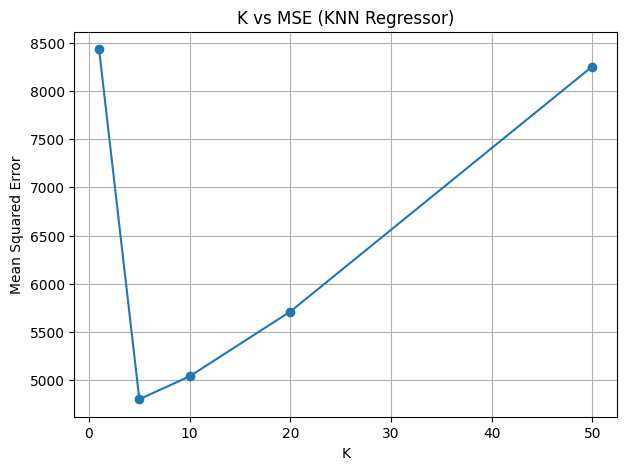

K=1, MSE=8430.421228238534
K=5, MSE=4803.90558674207
K=10, MSE=5041.107684099524
K=20, MSE=5712.019124800162
K=50, MSE=8251.371312581605


In [3]:
# Question 9:KNN Regressor with Distance Metrics and K-Value
# Analysis
# Task:
# 1. Generate a synthetic regression dataset
# (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
# 2. Train a KNN regressor with:
# a. Euclidean distance (K=5)
# b. Manhattan distance (K=5)
# c. Compare Mean Squared Error (MSE) for both.
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
# Q9: KNN Regressor analysis on synthetic data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# helper function
def knn_mse(Xtr, Xte, ytr, yte, n_neighbors=5, p=2):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, metric='minkowski', p=p)
    knn.fit(Xtr, ytr)
    ypred = knn.predict(Xte)
    return mean_squared_error(yte, ypred)

# 2. K=5 Euclidean (p=2) and Manhattan (p=1)
mse_euclid = knn_mse(X_train, X_test, y_train, y_test, n_neighbors=5, p=2)
mse_manh = knn_mse(X_train, X_test, y_train, y_test, n_neighbors=5, p=1)
print("MSE Euclidean (K=5):", mse_euclid)
print("MSE Manhattan (K=5):", mse_manh)

# 3. test K values
Ks = [1,5,10,20,50]
mses = [knn_mse(X_train, X_test, y_train, y_test, n_neighbors=k) for k in Ks]

plt.figure(figsize=(7,5))
plt.plot(Ks, mses, marker='o')
plt.title("K vs MSE (KNN Regressor)")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

for k, m in zip(Ks, mses):
    print(f"K={k}, MSE={m}")


Algorithm Performance Comparison:
BRUTE: Accuracy = 0.7446, Training Time = 0.0009 sec
KD_TREE: Accuracy = 0.7446, Training Time = 0.0016 sec
BALL_TREE: Accuracy = 0.7446, Training Time = 0.0016 sec


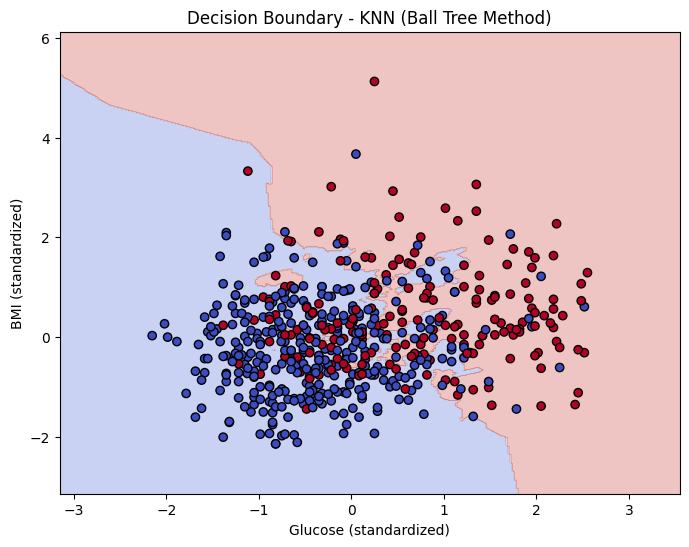

In [7]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
# Data
# Task:
# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
# 3. Train KNN using:
# a. Brute-force method
# b. KD-Tree
# c. Ball Tree
# 4. Compare their training time and accuracy.
# 5. Plot the decision boundary for the best-performing method (use 2 most important
# features).
# Dataset: Pima Indians Diabetes
# =============================
# Question 10: KNN with KD-Tree, Ball Tree, and Imputation
# =============================

# Import necessary libraries
import numpy as np
import pandas as pd
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset from GitHub (Pima Indians Diabetes dataset)
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

# Step 2: Replace zero values with NaN in selected columns
cols_with_missing_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols_with_missing_zeros:
    df[c] = df[c].replace(0, np.nan)

# Step 3: Apply KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values

# Step 4: Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train KNN models using different algorithms
results = {}
for algo in ['brute', 'kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start
    accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    results[algo] = {'Accuracy': accuracy, 'Training Time (s)': training_time}

# Step 7: Display results
print("Algorithm Performance Comparison:")
for algo, vals in results.items():
    print(f"{algo.upper()}: Accuracy = {vals['Accuracy']:.4f}, Training Time = {vals['Training Time (s)']:.4f} sec")

# Step 8: Visualize Decision Boundary using top 2 important features (Glucose and BMI)
feature_indices = [1, 5]  # Columns for Glucose and BMI
X_train_2d = X_train_scaled[:, feature_indices]
y_train_2d = y_train

# Train best-performing model (Ball Tree usually performs best)
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_best.fit(X_train_2d, y_train_2d)

# Create meshgrid for decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.title("Decision Boundary - KNN (Ball Tree Method)")
plt.show()
